# Entrega 4 - Aprendizaje no supervisado.

### Grupo 13:
     - J. Aguirre  C.I: 4.773.509-6
     - A. Collazo C.I: 4.455.617-4
     - G. Núnez C.I: 4.785.081-2

## 1. Objetivo

El principal objetivo de esta tarea es implementar y aplicar métodos de aprendizaje no supervisado a un conjunto de datos de alta dimensionalidad para encontrar patrones. El corpus a utilizar es Aquienvoto.uy proporcionado por el equipo docente. Se aplicará el método Principal Component Analysis (en adelante llamado PCA) y el algoritmo K-means.

En la primera parte se utilizará el método PCA para reducir las dimensiones del conjunto de datos y lograr una visualización exploratoria. A partir de este resultado se determinará si los partidos políticos de Uruguay agrupan votantes con respuestas similares.

En la segunda parte se aplicará el algoritmo K-means para agrupar los datos según los votantes de cada partido. Se experimentará con distintas cantidades de clusters predefinidas (2, 3, 5, 10 y 11), y además, se utilizará el coeficiente de Silhouette y Adjusted Rand Index (en adelante llamado ARI) para evaluar los resultados.

## 2. Diseño

En la siguiente sección se mencionan las decisiones de diseño utilizadas para la construcción de cada una de las partes del presente laboratorio.

### 2.1 Principal Component Analysis (PCA)

Como se mencionó anteriormente, el corpus utilizado es Aquienvoto.uy proporcionado por el equipo docente. Cada instancia del conjunto de datos consta de 29 columnas detalladas a continuación.
La primera columna representa el identificador de la instancia, la segunda columna representa el identificador del candidato político, las siguientes 26 columnas (es decir, desde la tercera hasta la vigésima octava) representan cada una de las respuestas proporcionadas por el votante, y la última columna corresponde a la fecha de generación de la instancia. Para implementar PCA no se tendrá en cuenta ni la fecha de generación de la instancia ni el identificador puesto que no resultan relevantes.
El primer paso consiste en cargar el conjunto de datos. Como se mencionó anteriormente, tanto la primera columna como la última son descartadas desde el inicio. Una vez cargadas todas las instancias se ordenan según el identificador del candidato político, y luego, se elimina dicha columna conservando así únicamente las 26 respuestas proporcionadas por el votante. El siguiente paso consiste en trasponer la matriz puesto que se trabajará por filas y no por columnas. Notar que ahora la fila 1 contiene todas las respuestas a la pregunta 1 y así respectivamente. A continuación, se reescalan los valores restando la media a cada una de las dimensión para centrar los datos en el origen.
Para medir cómo se relacionan las dimensiones entre sí se calcula la matriz de covarianza, y con ella, se calcula también los valores y vectores propios. Los vectores propios obtenidos indican cuánto varían los datos en la dirección correspondiente. El vector con el mayor valor propio es el componente principal de la matriz, es decir, muestra la dirección en la que los datos están más dispersos. En este caso se pretende graficar las instancias utilizando únicamente las dos dimensiones con mayor varianza para conocer las dispersión de los datos.


### 2.2 K-means

La implementación del algoritmo K-means fue organizada en un único módulo. El algoritmo recibe como entrada la cantidad de clusters a construir y el conjunto de datos, e imprime en la salida los clusters obtenidos, la cantidad de iteraciones realizadas, el coeficiente de Silhouette y la medida ARI obtenida.
El coeficiente de Silhouette consiste en….
En cuanto a la medida ARI ….
Un detalle importante, la medida ARI tiene sentido para el caso de once clusters dado que...
La implementación del algoritmo es directa. En primera instancia se inicializan los centroides de forma aleatoria  y se agrupan las instancias en base a los centroides más cercanos a cada una de ellas, configurando así  los cluster iniciales. La distancia utilizada es la distancia euclidiana. Luego de esto comienza el paso iterativo en el cual en cada paso se recalcula la posición de los centroides y se vuelven a generar los n cluster en base a la nueva posición de los mismos. El algoritmo continúa hasta que converge o se llega al límite de iteraciones. Para esta implementación se estableció el número máximo de iteraciones del algoritmo arbitrariamente en el valor 999. El algoritmo k-means es sensible a la elección inicial de los centroides, es decir que la elección de los mismos tiene un fuerte impacto en la calidad de los resultados obtenidos. Dado que es un algoritmo de búsqueda local, no se garantiza encontrar el óptimo global. Para mitigar este problema los centroides fueron inicializados diez veces para cada valor de n. Los resultados pueden verse en la siguiente sección.

## 3. Experimentación

### 3.1 Experimentación con PCA

Como se pretende graficar las instancias en dos dimensiones se eligen los dos valores propios más grandes en valor absoluto y se grafica. A continuación, se puede visualizar los datos graficados.

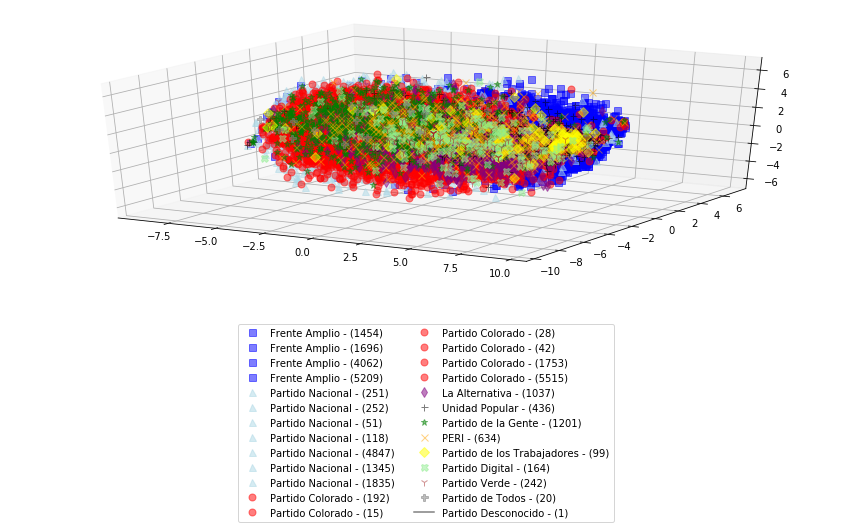

In [75]:
%run a/PCA.py "a/data.csv" 3 1

Gráfica 1: se visualiza la dispersión todas las instancias del corpus Aquienvoto.uy segun las dos dimensiones con mayor varianza y discriminadas por partido político.

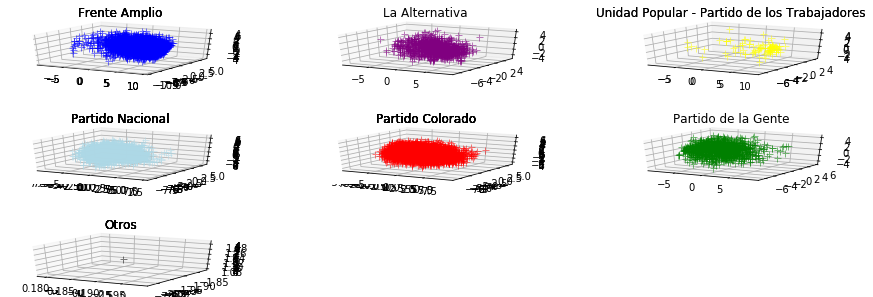

In [77]:
%run a/PCA.py "a/data.csv" 3 0

Gráfica 2: se visualiza cada uno de los distintos partidos políticos en una gráfica separada.

Como se visualiza en ambas gráficas, la primera impresión es que los partidos políticos se superponen.

### 3.2 Experimentación con K-means

En primera instancia se presentan los valores obtenidos para el coeficiente de Silhouette.

## 4. Conclusiones

## 5. Apéndice

## Referencias

**[1]**